In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn import metrics

In [322]:
df = pd.read_csv('credit_risk.csv')

In [270]:
df.head()

,age,salary,home_ownership,employment_time,loan_purposes,credit_score,Credit_Amount,loan_rate,Credit_Status,loan_percentage,Payment_History,Credit_History_Length
0,23,70000,RENT,3.0,EDUCATION,A,12000,7.90,0,0.17,N,2
1,25,25000,RENT,0.0,MEDICAL,C,8500,12.53,1,0.34,Y,2
2,24,67000,MORTGAGE,2.0,HOMEIMPROVEMENT,B,12150,10.37,0,0.18,N,3
3,23,69000,RENT,7.0,MEDICAL,A,6000,7.88,0,0.09,N,2
4,30,33000,MORTGAGE,2.0,DEBTCONSOLIDATION,A,6000,8.49,0,0.18,N,8


In [271]:
df.dtypes

age                        int64
salary                     int64
home_ownership            object
employment_time          float64
loan_purposes             object
credit_score              object
Credit_Amount              int64
loan_rate                float64
Credit_Status              int64
loan_percentage          float64
Payment_History           object
Credit_History_Length      int64
dtype: object

In [272]:
df.isnull().sum()

age                         0
salary                      0
home_ownership              0
employment_time           895
loan_purposes               0
credit_score                0
Credit_Amount               0
loan_rate                3116
Credit_Status               0
loan_percentage             0
Payment_History             0
Credit_History_Length       0
dtype: int64

In [273]:
col_enc = df[['home_ownership','credit_score','loan_purposes','Payment_History']]

In [274]:
le = preprocessing.LabelEncoder()

In [275]:
df[['home_ownership','credit_score','loan_purposes','Payment_History']] = col_enc.apply(le.fit_transform)

In [276]:
df.head()

,age,salary,home_ownership,employment_time,loan_purposes,credit_score,Credit_Amount,loan_rate,Credit_Status,loan_percentage,Payment_History,Credit_History_Length
0,23,70000,3,3.0,1,0,12000,7.90,0,0.17,0,2
1,25,25000,3,0.0,3,2,8500,12.53,1,0.34,1,2
2,24,67000,0,2.0,2,1,12150,10.37,0,0.18,0,3
3,23,69000,3,7.0,3,0,6000,7.88,0,0.09,0,2
4,30,33000,0,2.0,0,0,6000,8.49,0,0.18,0,8


In [277]:
df.dtypes

age                        int64
salary                     int64
home_ownership             int32
employment_time          float64
loan_purposes              int32
credit_score               int32
Credit_Amount              int64
loan_rate                float64
Credit_Status              int64
loan_percentage          float64
Payment_History            int32
Credit_History_Length      int64
dtype: object

In [278]:
df.isnull().sum()

age                         0
salary                      0
home_ownership              0
employment_time           895
loan_purposes               0
credit_score                0
Credit_Amount               0
loan_rate                3116
Credit_Status               0
loan_percentage             0
Payment_History             0
Credit_History_Length       0
dtype: int64

# Missing value imputation of employment_time column by mean

In [279]:
df['employment_time'].fillna((df['employment_time'].mean()), inplace=True)

In [280]:
df.isnull().sum()

age                         0
salary                      0
home_ownership              0
employment_time             0
loan_purposes               0
credit_score                0
Credit_Amount               0
loan_rate                3116
Credit_Status               0
loan_percentage             0
Payment_History             0
Credit_History_Length       0
dtype: int64

In [281]:
df

,age,salary,home_ownership,employment_time,loan_purposes,credit_score,Credit_Amount,loan_rate,Credit_Status,loan_percentage,Payment_History,Credit_History_Length
0,23,70000,3,3.000000,1,0,12000,7.90,0,0.17,0,2
1,25,25000,3,0.000000,3,2,8500,12.53,1,0.34,1,2
2,24,67000,0,2.000000,2,1,12150,10.37,0,0.18,0,3
3,23,69000,3,7.000000,3,0,6000,7.88,0,0.09,0,2
4,30,33000,0,2.000000,0,0,6000,8.49,0,0.18,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32,58800,2,16.000000,4,2,7000,13.99,0,0.12,0,7
32577,33,30000,3,2.000000,5,4,6000,19.42,1,0.20,0,10
32578,39,18300,3,0.000000,0,3,1200,14.74,1,0.07,1,11
32579,28,36000,0,4.789686,5,3,6000,15.21,0,0.17,0,7


# Missing value imputation of loan_rate column by ML model

In [282]:
test_data = df[df['loan_rate'].isnull()]
test_data

,age,salary,home_ownership,employment_time,loan_purposes,credit_score,Credit_Amount,loan_rate,Credit_Status,loan_percentage,Payment_History,Credit_History_Length
9,25,54000,3,1.0,4,0,3600,NaN,1,0.07,0,3
36,24,51000,0,8.0,0,1,12000,NaN,1,0.24,0,3
66,47,87000,0,15.0,4,0,10000,NaN,0,0.11,0,11
89,25,65000,3,2.0,0,1,4200,NaN,0,0.06,0,2
112,27,45336,0,12.0,3,1,4800,NaN,0,0.11,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
32509,23,200000,0,7.0,1,0,28000,NaN,0,0.14,0,2
32525,27,49000,3,0.0,3,1,11000,NaN,0,0.22,0,10
32527,22,31356,0,6.0,0,3,11225,NaN,1,0.36,1,2
32536,28,70000,0,0.0,5,1,5275,NaN,0,0.08,0,5


In [283]:
train_data = df.dropna()

In [284]:
train_data

,age,salary,home_ownership,employment_time,loan_purposes,credit_score,Credit_Amount,loan_rate,Credit_Status,loan_percentage,Payment_History,Credit_History_Length
0,23,70000,3,3.000000,1,0,12000,7.90,0,0.17,0,2
1,25,25000,3,0.000000,3,2,8500,12.53,1,0.34,1,2
2,24,67000,0,2.000000,2,1,12150,10.37,0,0.18,0,3
3,23,69000,3,7.000000,3,0,6000,7.88,0,0.09,0,2
4,30,33000,0,2.000000,0,0,6000,8.49,0,0.18,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32,58800,2,16.000000,4,2,7000,13.99,0,0.12,0,7
32577,33,30000,3,2.000000,5,4,6000,19.42,1,0.20,0,10
32578,39,18300,3,0.000000,0,3,1200,14.74,1,0.07,1,11
32579,28,36000,0,4.789686,5,3,6000,15.21,0,0.17,0,7


In [285]:
x_train = train_data.drop('loan_rate',axis=1)

In [286]:
y_train = train_data['loan_rate']

In [287]:
from sklearn.linear_model import LinearRegression

In [288]:
lr = LinearRegression()

In [289]:
lr.fit(x_train,y_train)

LinearRegression()

In [290]:
x_test = test_data.drop('loan_rate',axis=1)
x_test

,age,salary,home_ownership,employment_time,loan_purposes,credit_score,Credit_Amount,Credit_Status,loan_percentage,Payment_History,Credit_History_Length
9,25,54000,3,1.0,4,0,3600,1,0.07,0,3
36,24,51000,0,8.0,0,1,12000,1,0.24,0,3
66,47,87000,0,15.0,4,0,10000,0,0.11,0,11
89,25,65000,3,2.0,0,1,4200,0,0.06,0,2
112,27,45336,0,12.0,3,1,4800,0,0.11,0,8
...,...,...,...,...,...,...,...,...,...,...,...
32509,23,200000,0,7.0,1,0,28000,0,0.14,0,2
32525,27,49000,3,0.0,3,1,11000,0,0.22,0,10
32527,22,31356,0,6.0,0,3,11225,1,0.36,1,2
32536,28,70000,0,0.0,5,1,5275,0,0.08,0,5


In [291]:
y_pred = lr.predict(x_test)

In [292]:
test_data['y_pred'] = y_pred

C:\Users\Riyad\AppData\Local\Temp\ipykernel_9264\2303368509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y_pred'] = y_pred


In [293]:
test_data['y_pred'].values

array([ 7.73570506, 10.14727637,  7.66335014, ..., 15.36370876,
       10.33703533, 10.65276611])

In [294]:
df['loan_rate'].fillna(test_data['y_pred'],inplace=True)

In [295]:
df.isnull().sum()

age                      0
salary                   0
home_ownership           0
employment_time          0
loan_purposes            0
credit_score             0
Credit_Amount            0
loan_rate                0
Credit_Status            0
loan_percentage          0
Payment_History          0
Credit_History_Length    0
dtype: int64

In [296]:
df

,age,salary,home_ownership,employment_time,loan_purposes,credit_score,Credit_Amount,loan_rate,Credit_Status,loan_percentage,Payment_History,Credit_History_Length
0,23,70000,3,3.000000,1,0,12000,7.90,0,0.17,0,2
1,25,25000,3,0.000000,3,2,8500,12.53,1,0.34,1,2
2,24,67000,0,2.000000,2,1,12150,10.37,0,0.18,0,3
3,23,69000,3,7.000000,3,0,6000,7.88,0,0.09,0,2
4,30,33000,0,2.000000,0,0,6000,8.49,0,0.18,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32,58800,2,16.000000,4,2,7000,13.99,0,0.12,0,7
32577,33,30000,3,2.000000,5,4,6000,19.42,1,0.20,0,10
32578,39,18300,3,0.000000,0,3,1200,14.74,1,0.07,1,11
32579,28,36000,0,4.789686,5,3,6000,15.21,0,0.17,0,7


# Detecting Outliers

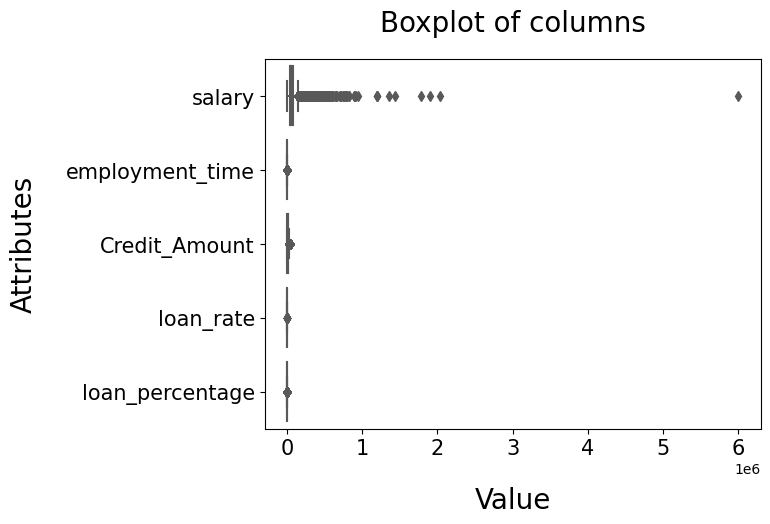

In [297]:
ax = sns.boxplot(data = df[["salary", "employment_time","Credit_Amount","loan_rate","loan_percentage"]], orient = "h", palette = "Set2")
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of columns", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

In [298]:
lower_quantile = df['salary'].quantile(0.25)
upper_quantile = df['salary'].quantile(0.75)

In [299]:
IQR = upper_quantile - lower_quantile

In [300]:
lower_bound = lower_quantile - 1.5 * IQR
upper_bound = upper_quantile + 1.5 * IQR

In [301]:
df = df[(df['salary']>lower_bound)&(df['salary']<upper_bound)]

In [302]:
df.shape

(31097, 12)

# Feature Selection

In [303]:
X = df.drop('Credit_Status',axis = 1)
y = df['Credit_Status']

In [304]:
X

,age,salary,home_ownership,employment_time,loan_purposes,credit_score,Credit_Amount,loan_rate,loan_percentage,Payment_History,Credit_History_Length
0,23,70000,3,3.000000,1,0,12000,7.90,0.17,0,2
1,25,25000,3,0.000000,3,2,8500,12.53,0.34,1,2
2,24,67000,0,2.000000,2,1,12150,10.37,0.18,0,3
3,23,69000,3,7.000000,3,0,6000,7.88,0.09,0,2
4,30,33000,0,2.000000,0,0,6000,8.49,0.18,0,8
...,...,...,...,...,...,...,...,...,...,...,...
32576,32,58800,2,16.000000,4,2,7000,13.99,0.12,0,7
32577,33,30000,3,2.000000,5,4,6000,19.42,0.20,0,10
32578,39,18300,3,0.000000,0,3,1200,14.74,0.07,1,11
32579,28,36000,0,4.789686,5,3,6000,15.21,0.17,0,7


In [305]:
y

0        0
1        1
2        0
3        0
4        0
        ..
32576    0
32577    1
32578    1
32579    0
32580    0
Name: Credit_Status, Length: 31097, dtype: int64

# Modelling and Evaluation

In [306]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

In [307]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth = 4)

In [308]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [309]:
y_pred = clf.predict(X_train)

In [310]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [311]:
accuracy_score(y_train, y_pred)

0.9094417288397222

In [312]:
clf.score(X_test,y_test)

0.902379421221865

In [313]:
print("Accuracy_score for Training set:", clf.score(X_train,y_train))

Accuracy_score for Training set: 0.9094417288397222


In [314]:
print("Accuracy_score for Test set:", clf.score(X_test,y_test))

Accuracy_score for Test set: 0.902379421221865


In [315]:
confusion_matrix = metrics.confusion_matrix(y_train, y_pred)

In [316]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

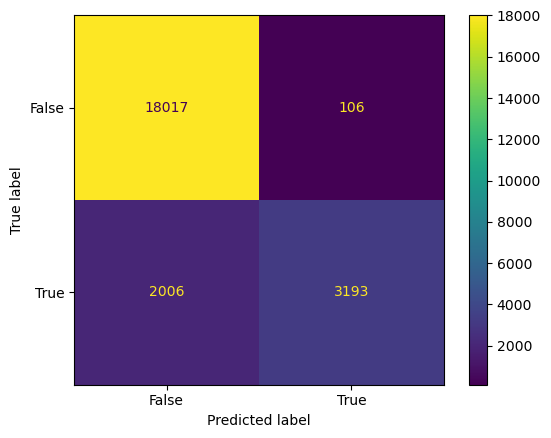

In [317]:
cm_display.plot()
plt.show()

In [318]:
Precision = metrics.precision_score(y_train, y_pred)
Precision

0.9678690512276448

In [319]:
recall = metrics.recall_score(y_train, y_pred)
recall

0.614156568570879

In [320]:
F1_score = metrics.f1_score(y_train, y_pred)
F1_score

0.7514709343374911